# 1. Config and Load DF

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# define the path to your project directory
project_dir = '/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/cleaned_df'

# change the current working directory
%cd {project_dir}

/content/drive/.shortcut-targets-by-id/1gjNRQI-rOo6nT6aXX2rHB5aG--wP82vd/TECH-GB-2336-Data-Science-and-AI-for-Business/project/cleaned_df


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

In [4]:
# load dataset
train = pd.read_csv('order_train.csv')
test = pd.read_csv('order_test.csv')
customer = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_customers_dataset.csv')
seller = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_sellers_dataset.csv')
item = pd.read_csv('/content/drive/MyDrive/TECH-GB-2336-Data-Science-and-AI-for-Business/project/raw_df/olist_order_items_dataset.csv')

In [5]:
train

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliver_diff,order_stage,carrier_stage,total_delivery_length,isLate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.1,2.4,6.1,8.5,0
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,3.8,9.5,13.3,0
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.2,0.9,1.9,2.8,0
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,5.5,1.7,14.8,16.5,0
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,11.5,5.9,4.1,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57297,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,15.5,6.1,5.0,11.1,0
57298,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10.4,1.1,7.2,8.3,0
57299,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.3,1.4,20.8,22.2,0
57300,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.5,1.3,23.6,24.9,0


In [6]:
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [8]:
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


# 2. Set up before merge

## 2.1 Drop unecessary columns

### 2.1.1 Test and Train

In [9]:
train.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'deliver_diff', 'order_stage', 'carrier_stage', 'total_delivery_length',
       'isLate'],
      dtype='object')

In [10]:
test.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'deliver_diff', 'order_stage', 'carrier_stage', 'total_delivery_length',
       'isLate'],
      dtype='object')

In [11]:
# from Train/Test
columns_to_drop_tt = [
    'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'deliver_diff', 'order_stage', 'carrier_stage', 'total_delivery_length'
]

train_processed = train.drop(columns=columns_to_drop_tt)
test_processed = test.drop(columns=columns_to_drop_tt)

In [12]:
# Train/Test output
print('Unnecessary columns dropped.')
print('train_processed head:')
train_processed.head()

Unnecessary columns dropped.
train_processed head:


,order_id,customer_id,isLate
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,0
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,0
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,0
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,0


In [13]:
print('\ntrain_processed head:')
test_processed.head()


train_processed head:


,order_id,customer_id,isLate
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,0
2,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,0
3,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,0
4,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,0


### 2.1.2 Customer

In [14]:
customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [15]:
# from Customer
columns_to_drop_cs = [
    'customer_unique_id'
]

customer_processed = customer.drop(columns=columns_to_drop_cs)

In [16]:
# customer output
print('Unnecessary columns dropped.')
print('customer_processed head:')
customer_processed.head()

Unnecessary columns dropped.
customer_processed head:


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


### 2.1.3 Seller

In [17]:
seller.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [18]:
# from Seller
columns_to_drop_sl = [
    'seller_zip_code_prefix', 'seller_city', 'seller_state'
]

seller_processed = seller.drop(columns=columns_to_drop_sl)

In [19]:
# seller output
print('Unnecessary columns dropped.')
print('seller_processed head:')
seller_processed.head()

Unnecessary columns dropped.
seller_processed head:


,seller_id
0,3442f8959a84dea7ee197c632cb2df15
1,d1b65fc7debc3361ea86b5f14c68d2e2
2,ce3ad9de960102d0677a81f5d0bb7b2d
3,c0f3eea2e14555b6faeea3dd58c1b1c3
4,51a04a8a6bdcb23deccc82b0b80742cf


### 2.1.4 Item

In [20]:
item.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [21]:
# from Item
columns_to_drop_it = [
   'order_item_id', 'shipping_limit_date', 'price', 'freight_value'
]

item_processed = item.drop(columns=columns_to_drop_it)

In [22]:
# item output
print('Unnecessary columns dropped.')
print('item_processed head:')
item_processed.head()

Unnecessary columns dropped.
item_processed head:


,order_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


## 2.2 Late Rate


> Calculate "Late Rate" only using 'train' dataset, but apply "Late Rate" to both train and test to avoid the leakage.

In [23]:
# merge train and customer
train_for_rate = train_processed.merge(
    customer_processed[['customer_id','customer_city','customer_state']],
    on='customer_id',
    how='left'
)


In [24]:
# Calculate late rate by city (using train only)
late_rate_by_city = (
    train_for_rate.groupby('customer_city')['isLate']
    .mean()
    .rename('late_rate_by_city')
)

# Calculate late rate by state (using train only)
late_rate_by_state = (
    train_for_rate.groupby('customer_state')['isLate']
    .mean()
    .rename('late_rate_by_state')
)


In [25]:
# merge set up using temporarly df
train_tmp = train_processed.merge(
    customer_processed[['customer_id','customer_city','customer_state']],
    on='customer_id',
    how='left'
)

test_tmp = test_processed.merge(
    customer_processed[['customer_id','customer_city','customer_state']],
    on='customer_id',
    how='left'
)


In [26]:
# merge late rate into train and test
train_tmp = train_tmp.merge(late_rate_by_city, on='customer_city', how='left')
train_tmp = train_tmp.merge(late_rate_by_state, on='customer_state', how='left')

test_tmp = test_tmp.merge(late_rate_by_city, on='customer_city', how='left')
test_tmp = test_tmp.merge(late_rate_by_state, on='customer_state', how='left')


In [27]:
# Handleing missing city/state in test
global_rate = train_processed['isLate'].mean()

train_tmp['late_rate_by_city'].fillna(global_rate, inplace=True)
test_tmp['late_rate_by_city'].fillna(global_rate, inplace=True)

train_tmp['late_rate_by_state'].fillna(global_rate, inplace=True)
test_tmp['late_rate_by_state'].fillna(global_rate, inplace=True)



/tmp/ipython-input-3448620145.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_tmp['late_rate_by_city'].fillna(global_rate, inplace=True)
/tmp/ipython-input-3448620145.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [28]:
# drop state/city column
train_tmp = train_tmp.drop(columns=['customer_city', 'customer_state'])
test_tmp  = test_tmp.drop(columns=['customer_city', 'customer_state'])


In [29]:
train_tmp

,order_id,customer_id,isLate,late_rate_by_city,late_rate_by_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0,0.051082,0.050075
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,0,0.250000,0.093960
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,0,0.038375,0.050075
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,0,0.000000,0.043523
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,0,0.147541,0.146865
...,...,...,...,...,...
57297,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,0,0.051082,0.050075
57298,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,0,0.052778,0.050075
57299,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,0,0.064706,0.050075
57300,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,0,0.000000,0.120549


## 2.3 One-hot encode

### 2.3.1 seller_id and Group by order_id from ITEM

In [30]:
# extract order_id and seller_id pairs
order_seller = item_processed[['order_id', 'seller_id']]

In [31]:
# ======== 변경 후 ========

# 1) train order 기준 seller 추출
train_order_seller = order_seller[
    order_seller['order_id'].isin(train_tmp['order_id'])
]

# 2) train 기준 OHE fit
seller_dummies_train = pd.get_dummies(train_order_seller['seller_id'], prefix='seller')
seller_ohe_train = pd.concat([train_order_seller[['order_id']], seller_dummies_train], axis=1)
seller_wide_train = seller_ohe_train.groupby('order_id').sum().reset_index()

# 3) test transform → train 컬럼 기준 맞추기
seller_dummies_test = pd.get_dummies(order_seller['seller_id'], prefix='seller')
seller_dummies_test = seller_dummies_test.reindex(columns=seller_dummies_train.columns, fill_value=0)

seller_ohe_test = pd.concat([order_seller[['order_id']], seller_dummies_test], axis=1)
seller_wide_test = seller_ohe_test.groupby('order_id').sum().reset_index()


In [32]:
seller_wide_train.head()

,order_id,seller_0015a82c2db000af6aaaf3ae2ecb0532,seller_001cca7ae9ae17fb1caed9dfb1094831,seller_002100f778ceb8431b7a1020ff7ab48f,seller_003554e2dce176b5555353e4f3555ac8,seller_004c9cd9d87a3c30c522c48c4fc07416,seller_00720abe85ba0859807595bbf045a33b,seller_00ab3eff1b5192e5f1a63bcecfee11c8,seller_00ee68308b45bc5e2660cd833c3f81cc,seller_00fc707aaaad2d31347cf883cd2dfe10,...,seller_ff314fa6033cc68ec451c47aee2d6ba4,seller_ff4e2d38692ce827b1a4f4b8196e680d,seller_ff4ea69c2a729e83e63c7579e4ef8170,seller_ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,seller_ff82e8873fba613f2261a9acc896fd84,seller_ffc470761de7d0232558ba5e786e57b7,seller_ffdd9f82b9a447f6f8d4b91554cc7dd3,seller_ffeee66ac5d5a62fe688b9d26f83f534,seller_fffd5413c0700ac820c7069d66d98c89,seller_ffff564a4f9085cd26170f4732393726
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00048cc3ae777c65dbb7d2a0634bc1ea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# seller output
seller_wide_test.head()

,order_id,seller_0015a82c2db000af6aaaf3ae2ecb0532,seller_001cca7ae9ae17fb1caed9dfb1094831,seller_002100f778ceb8431b7a1020ff7ab48f,seller_003554e2dce176b5555353e4f3555ac8,seller_004c9cd9d87a3c30c522c48c4fc07416,seller_00720abe85ba0859807595bbf045a33b,seller_00ab3eff1b5192e5f1a63bcecfee11c8,seller_00ee68308b45bc5e2660cd833c3f81cc,seller_00fc707aaaad2d31347cf883cd2dfe10,...,seller_ff314fa6033cc68ec451c47aee2d6ba4,seller_ff4e2d38692ce827b1a4f4b8196e680d,seller_ff4ea69c2a729e83e63c7579e4ef8170,seller_ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,seller_ff82e8873fba613f2261a9acc896fd84,seller_ffc470761de7d0232558ba5e786e57b7,seller_ffdd9f82b9a447f6f8d4b91554cc7dd3,seller_ffeee66ac5d5a62fe688b9d26f83f534,seller_fffd5413c0700ac820c7069d66d98c89,seller_ffff564a4f9085cd26170f4732393726
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3.2 One-hot encode from CUSTOMER

In [34]:
# ======== 변경 후 ========

# 1) train에 등장하는 customer만 추출
train_customers = customer_processed[
    customer_processed['customer_id'].isin(train_tmp['customer_id'])
]

# 2) train 기준으로 OHE fit
city_ohe_train  = pd.get_dummies(train_customers['customer_city'], prefix="customer_city")
state_ohe_train = pd.get_dummies(train_customers['customer_state'], prefix="customer_state")

# 3) test transform → train 컬럼 기준으로 맞추기
city_ohe_test = pd.get_dummies(customer_processed['customer_city'], prefix="customer_city")
city_ohe_test = city_ohe_test.reindex(columns=city_ohe_train.columns, fill_value=0)

state_ohe_test = pd.get_dummies(customer_processed['customer_state'], prefix="customer_state")
state_ohe_test = state_ohe_test.reindex(columns=state_ohe_train.columns, fill_value=0)

# 4) 최종 customer_ohe
customer_ohe_train = pd.concat([train_customers[['customer_id']], city_ohe_train, state_ohe_train], axis=1)
customer_ohe_test  = pd.concat([customer_processed[['customer_id']], city_ohe_test, state_ohe_test], axis=1)


In [35]:
customer_ohe_test

,customer_id,customer_city_abadia dos dourados,customer_city_abadiania,customer_city_abaete,customer_city_abaetetuba,customer_city_abaiara,customer_city_abare,customer_city_abatia,customer_city_abdon batista,customer_city_abelardo luz,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,06b8999e2fba1a1fbc88172c00ba8bc7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,18955e83d337fd6b2def6b18a428ac77,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,4e7b3e00288586ebd08712fdd0374a03,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,b2b6027bc5c5109e529d4dc6358b12c3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
99437,e7b71a9017aa05c9a7fd292d714858e8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
99438,5e28dfe12db7fb50a4b2f691faecea5e,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99439,56b18e2166679b8a959d72dd06da27f9,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [36]:
# customer output
customer_ohe_train.head()

,customer_id,customer_city_abadia dos dourados,customer_city_abadiania,customer_city_abaete,customer_city_abaetetuba,customer_city_abaiara,customer_city_abare,customer_city_abatia,customer_city_abdon batista,customer_city_abelardo luz,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,06b8999e2fba1a1fbc88172c00ba8bc7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,18955e83d337fd6b2def6b18a428ac77,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,879864dab9bc3047522c92c82e1212b8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,fd826e7cf63160e536e0908c76c3f441,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,5e274e7a0c3809e14aba7ad5aae0d407,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Merge

In [37]:
# processed base datasets
train_base = train_tmp.copy()
test_base = test_tmp.copy()

## 3.1 merge location (city & state) and seller



In [38]:
train_m = train_tmp.merge(customer_ohe_train, on="customer_id", how="left") \
                   .merge(seller_wide_train, on="order_id", how="left")

test_m  = test_tmp.merge(customer_ohe_test, on="customer_id", how="left") \
                  .merge(seller_wide_test, on="order_id", how="left")


In [39]:
train_m.head()

,order_id,customer_id,isLate,late_rate_by_city,late_rate_by_state,customer_city_abadia dos dourados,customer_city_abadiania,customer_city_abaete,customer_city_abaetetuba,customer_city_abaiara,...,seller_ff314fa6033cc68ec451c47aee2d6ba4,seller_ff4e2d38692ce827b1a4f4b8196e680d,seller_ff4ea69c2a729e83e63c7579e4ef8170,seller_ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,seller_ff82e8873fba613f2261a9acc896fd84,seller_ffc470761de7d0232558ba5e786e57b7,seller_ffdd9f82b9a447f6f8d4b91554cc7dd3,seller_ffeee66ac5d5a62fe688b9d26f83f534,seller_fffd5413c0700ac820c7069d66d98c89,seller_ffff564a4f9085cd26170f4732393726
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,0,0.051082,0.050075,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,0,0.250000,0.093960,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,0,0.038375,0.050075,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,0,0.000000,0.043523,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,0,0.147541,0.146865,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train_m.columns

Index(['order_id', 'customer_id', 'isLate', 'late_rate_by_city',
       'late_rate_by_state', 'customer_city_abadia dos dourados',
       'customer_city_abadiania', 'customer_city_abaete',
       'customer_city_abaetetuba', 'customer_city_abaiara',
       ...
       'seller_ff314fa6033cc68ec451c47aee2d6ba4',
       'seller_ff4e2d38692ce827b1a4f4b8196e680d',
       'seller_ff4ea69c2a729e83e63c7579e4ef8170',
       'seller_ff69aa92bb6b1bf9b8b7a51c2ed9cf8b',
       'seller_ff82e8873fba613f2261a9acc896fd84',
       'seller_ffc470761de7d0232558ba5e786e57b7',
       'seller_ffdd9f82b9a447f6f8d4b91554cc7dd3',
       'seller_ffeee66ac5d5a62fe688b9d26f83f534',
       'seller_fffd5413c0700ac820c7069d66d98c89',
       'seller_ffff564a4f9085cd26170f4732393726'],
      dtype='object', length=5563)

In [41]:
train_m.shape

(57302, 5563)

In [42]:
# Count duplicate order_id in each dataset
train_dupes = train['order_id'].duplicated().sum()
test_dupes = test['order_id'].duplicated().sum()

In [43]:
train_dupes, test_dupes

(np.int64(0), np.int64(0))

# 4. Modeling

## 4.1 Train

### 4.1.1 XGBoost Regular (Baseline)

In [44]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, average_precision_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [47]:
train_final = train_m.copy()
test_final = test_m.copy()

In [48]:
# Feature/Target split
y_train = train_final['isLate']
y_test = test_final['isLate']
X_train = train_final.drop(columns=['isLate', 'order_id', 'customer_id']).copy()
X_test = test_final.drop(columns=['isLate', 'order_id', 'customer_id']).copy()


In [48]:
# Train XGBoost Base Model
model_xgb_base = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

model_xgb_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
# Original variable naming (keep yours)
y_pred_prob = model_xgb_base.predict_proba(X_test)[:, 1]
y_pred      = (y_pred_prob > 0.5).astype(int) #threshold

# Clean naming for model comparison
xgb_base_prob = y_pred_prob
xgb_base_pred = y_pred


In [50]:
# Metrics
threshold = 0.5

auc     = roc_auc_score(y_test, xgb_base_prob)
acc     = accuracy_score(y_test, xgb_base_pred)
prec    = precision_score(y_test, xgb_base_pred, zero_division=0)
rec     = recall_score(y_test, xgb_base_pred)
f1      = f1_score(y_test, xgb_base_pred)
pr_auc  = average_precision_score(y_test, xgb_base_prob)

In [51]:
# Print
print("====== XGBoost Base Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

====== XGBoost Base Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5874
Test PR-AUC:    0.1164
Test Accuracy:  0.9040
Test Precision: 0.1295
Test Recall:    0.0166
Test F1 Score:  0.0294


#### 4.1.1.1 Find Best threshold

In [73]:
def find_best_threshold(y_true, y_prob, recall_target=0.80):
    """
    y_true : 실제 y_test 또는 y_train
    y_prob : 모델이 예측한 확률 변수 (어떤 이름이든 OK)
    """
    precision_vals, recall_vals, thresholds = precision_recall_curve(y_true, y_prob)

    # 1) F1-max threshold
    f1_scores = []
    for t in thresholds:
        preds = (y_prob > t).astype(int)
        f1_scores.append(f1_score(y_true, preds))
    best_t_f1 = thresholds[np.argmax(f1_scores)]
    best_f1 = np.max(f1_scores)

    # 2) Precision = Recall threshold
    diff = np.abs(precision_vals[:-1] - recall_vals[:-1])
    best_t_balance = thresholds[np.argmin(diff)]

    # 3) Recall ≥ target 중 Precision 최대 threshold
    valid = np.where(recall_vals[:-1] >= recall_target)[0]
    if len(valid) > 0:
        best_t_recall_target = thresholds[valid[np.argmax(precision_vals[valid])]]
    else:
        best_t_recall_target = None

    return {
        "best_f1_threshold": best_t_f1,
        "best_f1_score": best_f1,
        "best_balance_threshold": best_t_balance,
        "best_recall_based_threshold": best_t_recall_target
    }


In [53]:
best_thresholds_xgb_base = find_best_threshold(y_test, xgb_base_prob)
best_thresholds_xgb_base


{'best_f1_threshold': np.float32(0.09517043),
 'best_f1_score': np.float64(0.18892282065519156),
 'best_balance_threshold': np.float32(0.18128447),
 'best_recall_based_threshold': np.float32(0.03460043)}

#### 4.1.1.2 Confustion Matrix

<Figure size 600x500 with 0 Axes>

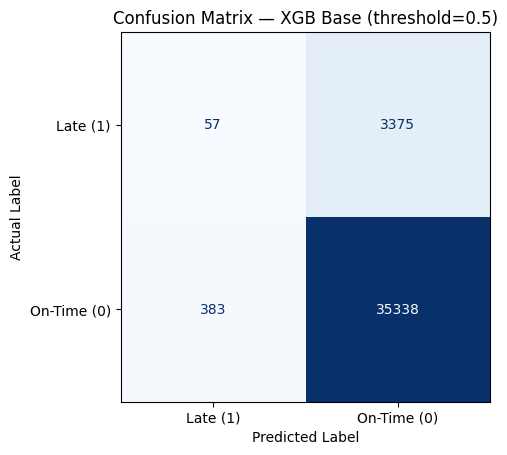

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, xgb_base_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late (1)', 'On-Time (0)'])

plt.figure(figsize=(6,5))
disp.plot(cmap='Blues', colorbar=False)
plt.title(f"Confusion Matrix — XGB Base (threshold={threshold})")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### 4.1.1.3 Precision-Recall Curve

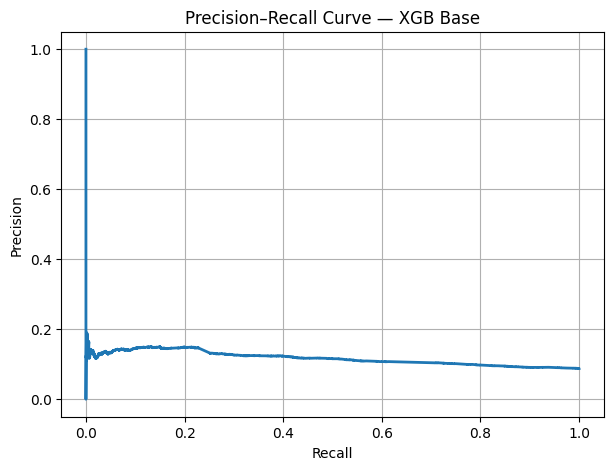

In [55]:
precision_curve, recall_curve, thresholds_curve = precision_recall_curve(y_test, xgb_base_prob)

plt.figure(figsize=(7,5))
plt.plot(recall_curve, precision_curve, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve — XGB Base")
plt.grid(True)
plt.show()

### 4.1.2 XGBoost Imbalance handling

In [49]:
# Sum of "isLate == 1"
num_late = (y_train == 1).sum()
num_on_time = (y_train == 0).sum()

print("The number of Late:", num_late)
print("The number of On-time:", num_on_time)

The number of Late: 4393
The number of On-time: 52909


#### 4.1.2.1 Undersampling


In [57]:
# Feature/Target split
y_train = train_final['isLate']
y_test = test_final['isLate']
X_train = train_final.drop(columns=['isLate', 'order_id', 'customer_id']).copy()
X_test = test_final.drop(columns=['isLate', 'order_id', 'customer_id']).copy()

In [58]:
from sklearn.utils import resample

# Split train_final first
df_train = train_final.copy()

late_df = df_train[df_train['isLate'] == 1]
on_time_df = df_train[df_train['isLate'] == 0]

In [59]:
from sklearn.utils import resample

# Undersampling majority class
undersampled_on_time = resample(
    on_time_df,
    replace=False,
    n_samples=len(late_df),   # match minority count
    random_state=42
)


In [60]:
# Final Undersample dataset
df_under = pd.concat([late_df, undersampled_on_time]).sample(frac=1, random_state=42)

print(df_under['isLate'].value_counts())

isLate
0    4393
1    4393
Name: count, dtype: int64


In [61]:
# build X_under/y_under
y_under = df_under['isLate']
X_under = df_under.drop(columns=['isLate', 'order_id', 'customer_id'])

In [62]:
# train model
model_under = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

model_under.fit(X_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [63]:
# Predict on Test — Undersampling
y_under_test_prob = model_under.predict_proba(X_test)[:, 1]
y_under_test = (y_under_test_prob > 0.5).astype(int)

# Clean naming (for consistency)
xgb_under_prob = y_under_test_prob
xgb_under_pred = y_under_test


In [64]:
# Detailed Metrics (UNDERSAMPLING)
threshold = 0.5

auc     = roc_auc_score(y_test, xgb_under_prob)
acc     = accuracy_score(y_test, xgb_under_pred)
prec    = precision_score(y_test, xgb_under_pred, zero_division=0)
rec     = recall_score(y_test, xgb_under_pred)
f1      = f1_score(y_test, xgb_under_pred)
pr_auc  = average_precision_score(y_test, xgb_under_prob)



In [65]:
# Print
print("====== XGBoost Undersampling Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

====== XGBoost Undersampling Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5844
Test PR-AUC:    0.1166
Test Accuracy:  0.6554
Test Precision: 0.1171
Test Recall:    0.4484
Test F1 Score:  0.1857


In [66]:
# Best threshold
best_thresholds_xgb_under = find_best_threshold(y_test, xgb_under_prob)
best_thresholds_xgb_under



{'best_f1_threshold': np.float32(0.5013679),
 'best_f1_score': np.float64(0.1859733978234583),
 'best_balance_threshold': np.float32(0.99436957),
 'best_recall_based_threshold': np.float32(0.30533266)}

##### 4.1.2.1.1 Undersampling Confusion Matrix

<Figure size 600x500 with 0 Axes>

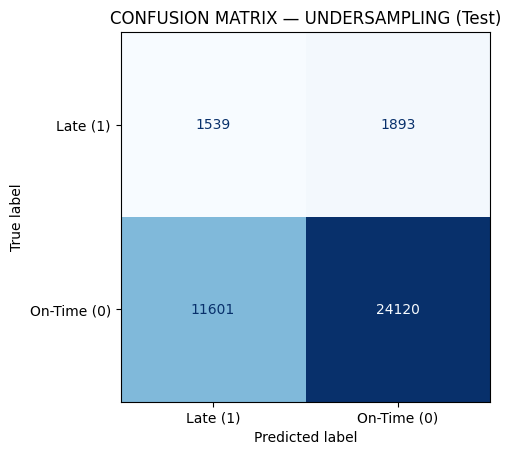

In [67]:
# CONFUSION MATRIX — UNDERSAMPLING
cm_under = confusion_matrix(y_test, xgb_under_pred, labels=[1, 0])
disp_under = ConfusionMatrixDisplay(confusion_matrix=cm_under,
                                    display_labels=['Late (1)', 'On-Time (0)'])

plt.figure(figsize=(6,5))
disp_under.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — UNDERSAMPLING (Test)")
plt.show()



##### 4.1.2.1.2 PR Curve (Undersampling)

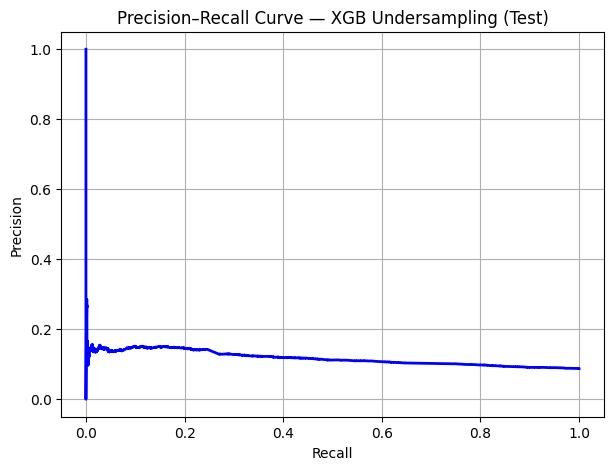

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# PR for UNDERSAMPLING model
precision_curve, recall_curve, _ = precision_recall_curve(y_test, xgb_under_prob)

plt.figure(figsize=(7,5))
plt.plot(recall_curve, precision_curve, linewidth=2, color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — XGB Undersampling (Test)")
plt.grid(True)
plt.show()


#### 4.1.2.2 Oversampling

In [69]:
# Oversample class to match the majority count
oversampled_late = resample(
    late_df,
    replace=True,
    n_samples=num_on_time,
    random_state=42
)


In [70]:
# Final Oversampled dataset
df_over = pd.concat([oversampled_late, on_time_df]).sample(frac=1, random_state=42)
print(df_over['isLate'].value_counts())

isLate
0    52909
1    52909
Name: count, dtype: int64


In [71]:
# Build X_over/y_over
y_over = df_over['isLate']
X_over = df_over.drop(columns=['isLate', 'order_id', 'customer_id'])


In [72]:
# train model
model_over = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

model_over.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [73]:
# Predict on Test (OVERSAMPLING)
y_over_test_prob = model_over.predict_proba(X_test)[:, 1]
y_over_test = (y_over_test_prob > 0.5).astype(int)

# Clean naming (recommended for consistency)
xgb_over_prob = y_over_test_prob
xgb_over_pred = y_over_test

In [74]:
# Detailed Metrics (OVERSAMPLING)
threshold = 0.5

auc     = roc_auc_score(y_test, xgb_over_prob)
acc     = accuracy_score(y_test, xgb_over_pred)
prec    = precision_score(y_test, xgb_over_pred, zero_division=0)
rec     = recall_score(y_test, xgb_over_pred)
f1      = f1_score(y_test, xgb_over_pred)
pr_auc  = average_precision_score(y_test, xgb_over_prob)



In [75]:
# Print output
print("====== XGBoost Oversampling Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

====== XGBoost Oversampling Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5885
Test PR-AUC:    0.1175
Test Accuracy:  0.6874
Test Precision: 0.1233
Test Recall:    0.4202
Test F1 Score:  0.1907


In [76]:
# Best threshold
best_thresholds_xgb_over = find_best_threshold(y_test, xgb_over_prob)
best_thresholds_xgb_over

{'best_f1_threshold': np.float32(0.46294716),
 'best_f1_score': np.float64(0.19112177564487104),
 'best_balance_threshold': np.float32(0.9956691),
 'best_recall_based_threshold': np.float32(0.27193812)}

##### 4.1.2.2.1 Oversampling Confusion Matrix

<Figure size 600x500 with 0 Axes>

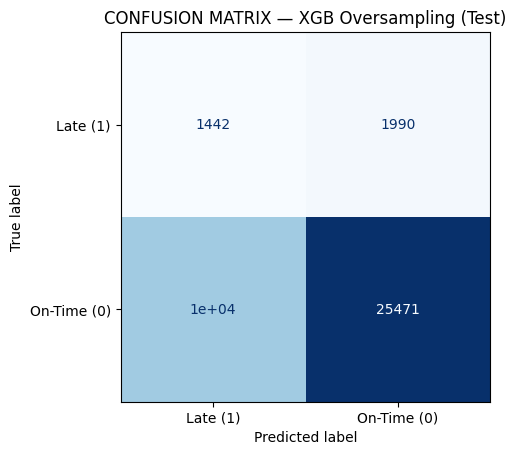

In [77]:
# CONFUSION MATRIX — OVERSAMPLING
cm_over = confusion_matrix(y_test, xgb_over_pred, labels=[1, 0])
disp_over = ConfusionMatrixDisplay(confusion_matrix=cm_over,
                                   display_labels=['Late (1)', 'On-Time (0)'])

plt.figure(figsize=(6,5))
disp_over.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — XGB Oversampling (Test)")
plt.show()

##### 4.1.2.2.2 PR Curve (Oversampling)

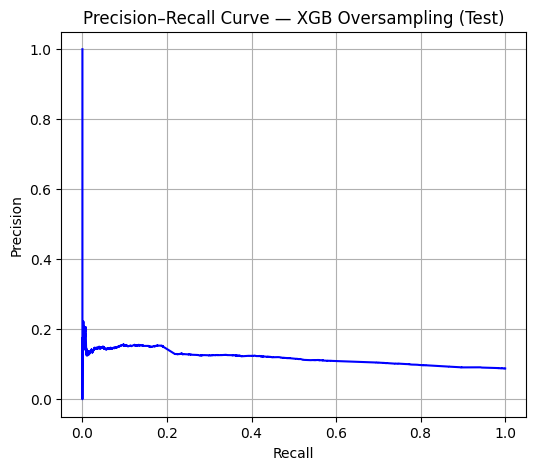

In [78]:
# PR for OVERSAMPLING model
precision_curve, recall_curve, _ = precision_recall_curve(y_test, xgb_over_prob)

plt.figure(figsize=(6,5))
plt.plot(recall_curve, precision_curve, color='blue')
plt.title("Precision–Recall Curve — XGB Oversampling (Test)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

#### 4.1.2.3 Weighting (scale_pos)

In [79]:
# calculate weight for XGB plain weighted model
neg = num_on_time   # majority count
pos = num_late      # minority count
ratio = neg / pos

print("scale_pos_weight =", ratio)


scale_pos_weight = 12.04393353061689


In [80]:
# Train XGBoost Weighted (plain, no L2)
model_weight = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=ratio,   # 핵심
    tree_method='hist',
    random_state=42
)

model_weight.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [81]:
# Predict on Test (WEIGHTING)
y_weight_test_prob = model_weight.predict_proba(X_test)[:, 1]
y_weight_test = (y_weight_test_prob > 0.5).astype(int)

# Consistent naming for comparison tables
xgb_weight_prob = y_weight_test_prob
xgb_weight_pred = y_weight_test


In [82]:
# Detailed Metrics (WEIGHTING)
threshold = 0.5

auc     = roc_auc_score(y_test, xgb_weight_prob)
acc     = accuracy_score(y_test, xgb_weight_pred)
prec    = precision_score(y_test, xgb_weight_pred, zero_division=0)
rec     = recall_score(y_test, xgb_weight_pred)
f1      = f1_score(y_test, xgb_weight_pred)
pr_auc  = average_precision_score(y_test, xgb_weight_prob)


In [83]:
# Result
print("====== XGBoost Weighted (Plain) Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

====== XGBoost Weighted (Plain) Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5874
Test PR-AUC:    0.1167
Test Accuracy:  0.6677
Test Precision: 0.1209
Test Recall:    0.4452
Test F1 Score:  0.1902


In [84]:
# Best threshold
best_thresholds_xgb_weight = find_best_threshold(y_test, xgb_weight_prob)
best_thresholds_xgb_weight


{'best_f1_threshold': np.float32(0.514854),
 'best_f1_score': np.float64(0.19136041263700837),
 'best_balance_threshold': np.float32(0.9937024),
 'best_recall_based_threshold': np.float32(0.27708957)}

##### 4.1.2.3.1 Weighting (scale_pos_weight) Confusion Matrix

<Figure size 600x500 with 0 Axes>

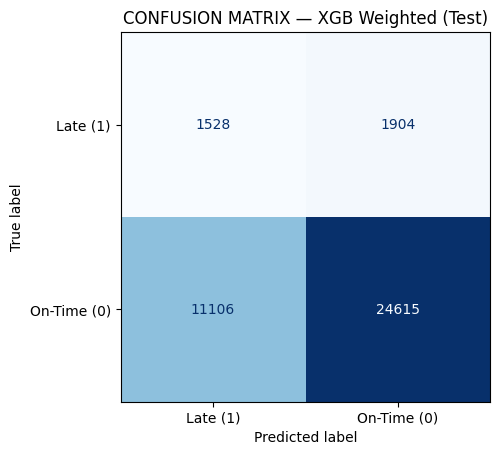

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# CONFUSION MATRIX — WEIGHTING (scale_pos_weight)
cm_weight = confusion_matrix(y_test, xgb_weight_pred, labels=[1, 0])
disp_weight = ConfusionMatrixDisplay(confusion_matrix=cm_weight,
                                     display_labels=['Late (1)', 'On-Time (0)'])

plt.figure(figsize=(6,5))
disp_weight.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — XGB Weighted (Test)")
plt.show()



##### 4.1.2.3.2 PR Curve (Weighting / scale_pos_weight)

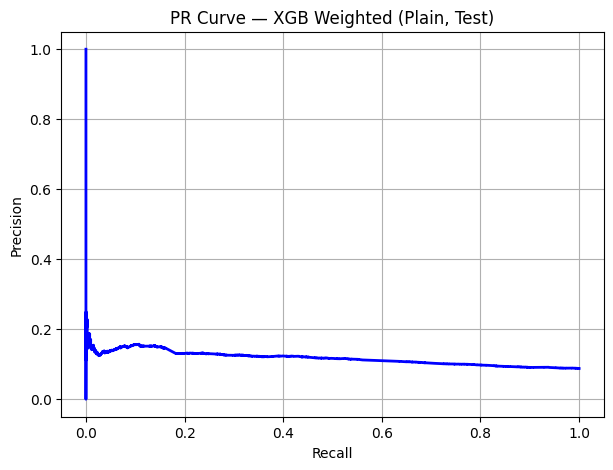

In [86]:
from sklearn.metrics import precision_recall_curve

# PR for WEIGHTING
precision_curve, recall_curve, _ = precision_recall_curve(y_test, xgb_weight_prob)

plt.figure(figsize=(7,5))
plt.plot(recall_curve, precision_curve, linewidth=2, color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve — XGB Weighted (Plain, Test)")
plt.grid(True)
plt.show()


### 4.1.3 Random Forest (Baseline)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# feature/traget split
y_train = train_final['isLate']
X_train = train_final.drop(columns=['isLate', 'order_id', 'customer_id']).copy()
X_test  = test_final.drop(columns=['isLate', 'order_id', 'customer_id']).copy()


In [88]:
# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    class_weight=None,   # baseline
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [89]:
# Original variable names (keep these)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Clean naming (recommended for comparisons)
rf_base_pred = y_pred
rf_base_prob = y_pred_proba

In [90]:
# Detailed Train Metrics
threshold = 0.5

auc     = roc_auc_score(y_test, rf_base_prob)
acc     = accuracy_score(y_test, rf_base_pred)
prec    = precision_score(y_test, rf_base_pred, zero_division=0)
rec     = recall_score(y_test, rf_base_pred)
f1      = f1_score(y_test, rf_base_pred)
pr_auc  = average_precision_score(y_test, rf_base_prob)


In [91]:
# Result
print("====== Random Forest Base Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")


====== Random Forest Base Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5779
Test PR-AUC:    0.1123
Test Accuracy:  0.8956
Test Precision: 0.1378
Test Recall:    0.0364
Test F1 Score:  0.0576


In [92]:
# best threshold
best_thresholds_rf_base = find_best_threshold(y_test, rf_base_prob)
best_thresholds_rf_base

{'best_f1_threshold': np.float64(0.04541666666666667),
 'best_f1_score': np.float64(0.1850079744816587),
 'best_balance_threshold': np.float64(0.943),
 'best_recall_based_threshold': np.float64(0.0)}

#### 4.1.3.1 Confusion Matrix

<Figure size 600x500 with 0 Axes>

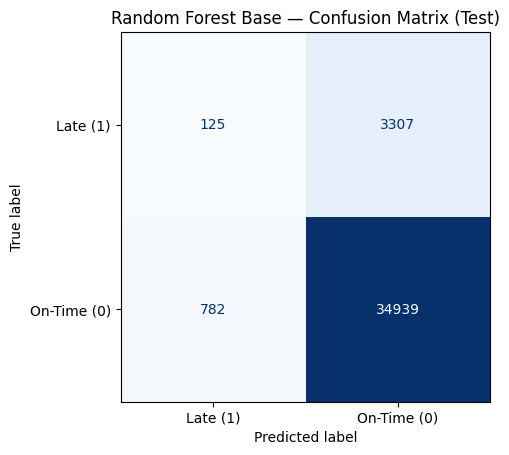

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_rf_base = confusion_matrix(y_test, rf_base_pred, labels=[1, 0])
disp_rf_base = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf_base,
    display_labels=['Late (1)', 'On-Time (0)']
)

plt.figure(figsize=(6,5))
disp_rf_base.plot(cmap='Blues', colorbar=False)
plt.title("Random Forest Base — Confusion Matrix (Test)")
plt.show()


#### 4.1.3.2 Precision-Recall Curve

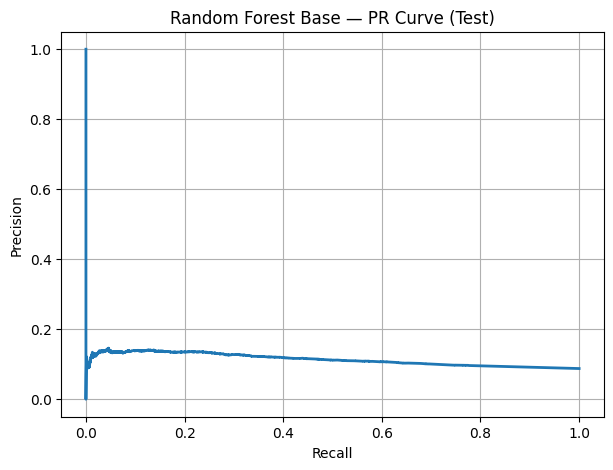

In [94]:
from sklearn.metrics import precision_recall_curve

precision_curve, recall_curve, _ = precision_recall_curve(y_test, rf_base_prob)

plt.figure(figsize=(7,5))
plt.plot(recall_curve, precision_curve, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Random Forest Base — PR Curve (Test)")
plt.grid(True)
plt.show()



### 4.1.4 Random Forset Imbalance handling

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#### 4.1.4.1 RF Undersampling

In [96]:
from imblearn.under_sampling import RandomUnderSampler

# undersample dataset
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)


In [97]:
print("Before:", y_train.value_counts().to_dict())
print("After Undersampling:", y_rus.value_counts().to_dict())

Before: {0: 52909, 1: 4393}
After Undersampling: {0: 4393, 1: 4393}


In [98]:
# train model
rf_under = RandomForestClassifier(
    n_estimators=200,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

rf_under.fit(X_rus, y_rus)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [99]:
# Predict on Test — RF Undersampling
y_pred_under = rf_under.predict(X_test)
y_prob_under = rf_under.predict_proba(X_test)[:, 1]

# Clean naming for consistent comparison
rf_under_pred = y_pred_under
rf_under_prob = y_prob_under


In [100]:
# Metrics
threshold = 0.5

auc     = roc_auc_score(y_test, rf_under_prob)
acc     = accuracy_score(y_test, rf_under_pred)
prec    = precision_score(y_test, rf_under_pred, zero_division=0)
rec     = recall_score(y_test, rf_under_pred)
f1      = f1_score(y_test, rf_under_pred)
pr_auc  = average_precision_score(y_test, rf_under_prob)




In [101]:
# Result
print("====== RF UnderSampling Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

====== RF UnderSampling Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5787
Test PR-AUC:    0.1110
Test Accuracy:  0.6444
Test Precision: 0.1170
Test Recall:    0.4671
Test F1 Score:  0.1872


In [102]:
# Best threshold
best_thresholds_rf_under = find_best_threshold(y_test, rf_under_prob)

print("=== RF Undersample — Best Thresholds ===")
best_thresholds_rf_under


=== RF Undersample — Best Thresholds ===


{'best_f1_threshold': np.float64(0.4566666666666667),
 'best_f1_score': np.float64(0.18847714362997026),
 'best_balance_threshold': np.float64(0.8472916666666667),
 'best_recall_based_threshold': np.float64(0.1415096708846708)}

###### 4.1.4.1.1 Confusion Matrix (RF Under)




<Figure size 600x500 with 0 Axes>

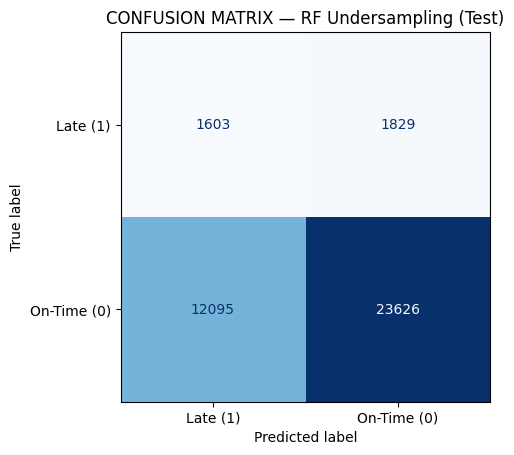

In [103]:
# Confusion Metrix
cm_rf_under = confusion_matrix(y_test, rf_under_pred, labels=[1, 0])
disp_rf_under = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf_under,
    display_labels=['Late (1)', 'On-Time (0)']
)

plt.figure(figsize=(6,5))
disp_rf_under.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — RF Undersampling (Test)")
plt.show()


###### 4.1.4.1.2 PR Curve (RF Under)

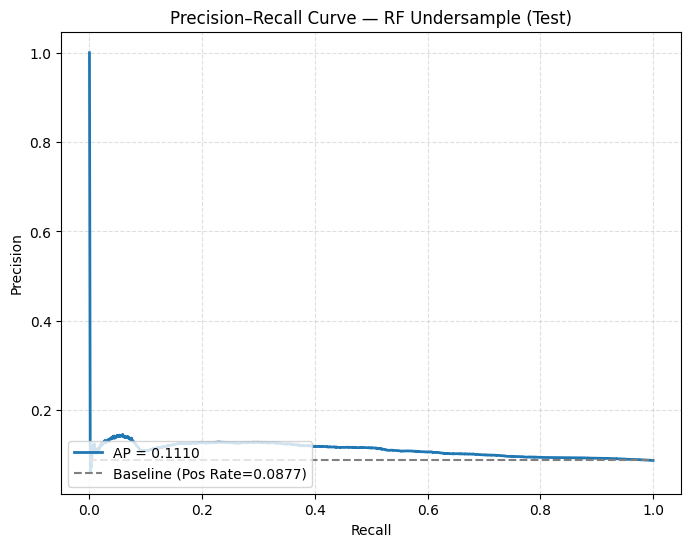

In [104]:
# Precision–Recall Curve (RF Undersample)
prec_curve, rec_curve, _ = precision_recall_curve(y_test, rf_under_prob)
ap_under = average_precision_score(y_test, rf_under_prob)

plt.figure(figsize=(8,6))
plt.plot(rec_curve, prec_curve, linewidth=2, label=f"AP = {ap_under:.4f}")

# Baseline (positive rate)
positive_rate = y_test.mean()
plt.hlines(positive_rate, 0, 1, colors='gray', linestyles='dashed',
           label=f"Baseline (Pos Rate={positive_rate:.4f})")

plt.title("Precision–Recall Curve — RF Undersample (Test)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#### 4.1.4.2 RF Oversampling

In [105]:
from imblearn.over_sampling import RandomOverSampler

# oversample dataset
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [106]:
print("Before:", y_train.value_counts().to_dict())
print("After Oversampling:", y_ros.value_counts().to_dict())


Before: {0: 52909, 1: 4393}
After Oversampling: {0: 52909, 1: 52909}


In [107]:
# train model
rf_over = RandomForestClassifier(
    n_estimators=200,
    class_weight=None,
    random_state=42,
    n_jobs=-1
)

rf_over.fit(X_ros, y_ros)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [108]:
# Predict on Test — RF Oversample
y_pred_over = rf_over.predict(X_test)
y_prob_over = rf_over.predict_proba(X_test)[:, 1]

# Clean naming for consistent comparison
rf_over_pred = y_pred_over
rf_over_prob = y_prob_over


In [109]:
# Metrics
threshold = 0.5

auc     = roc_auc_score(y_test, rf_over_prob)
acc     = accuracy_score(y_test, rf_over_pred)
prec    = precision_score(y_test, rf_over_pred, zero_division=0)
rec     = recall_score(y_test, rf_over_pred)
f1      = f1_score(y_test, rf_over_pred)
pr_auc  = average_precision_score(y_test, rf_over_prob)


In [110]:
# Result
print("====== RF Oversampling Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")

====== RF Oversampling Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5669
Test PR-AUC:    0.1074
Test Accuracy:  0.8245
Test Precision: 0.1100
Test Recall:    0.1413
Test F1 Score:  0.1237


In [111]:
# best trheshold
best_thresholds_rf_over = find_best_threshold(y_test, rf_over_prob)

print("=== RF Oversample — Best Thresholds ===")
best_thresholds_rf_over

=== RF Oversample — Best Thresholds ===


{'best_f1_threshold': np.float64(0.0768670475766064),
 'best_f1_score': np.float64(0.18383075570268453),
 'best_balance_threshold': np.float64(0.6287125152582198),
 'best_recall_based_threshold': np.float64(0.0)}

##### 4.1.4.2.1 Confusion Matrix (RF Over)

<Figure size 600x500 with 0 Axes>

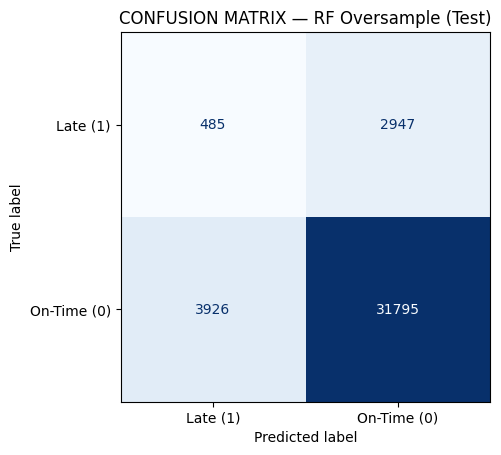

In [112]:
# CONFUSION MATRIX — OVERSAMPLING
cm_rf_over = confusion_matrix(y_test, rf_over_pred, labels=[1, 0])
disp_rf_over = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf_over,
    display_labels=['Late (1)', 'On-Time (0)']
)

plt.figure(figsize=(6,5))
disp_rf_over.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — RF Oversample (Test)")
plt.show()


##### 4.1.4.2.2 PR Curve (RF Over)

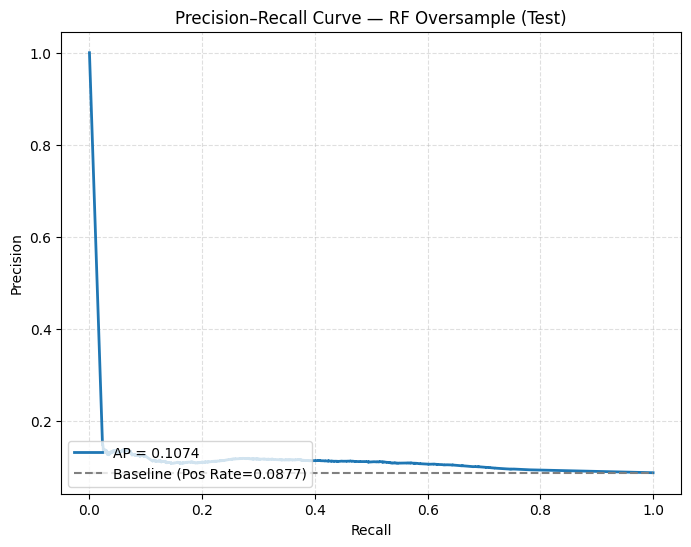

In [113]:
# Precision–Recall Curve (RF Oversample)
prec_curve, rec_curve, _ = precision_recall_curve(y_test, rf_over_prob)
ap_over = average_precision_score(y_test, rf_over_prob)

plt.figure(figsize=(8,6))
plt.plot(rec_curve, prec_curve, linewidth=2, label=f"AP = {ap_over:.4f}")

positive_rate = y_test.mean()
plt.hlines(positive_rate, xmin=0, xmax=1, colors='gray',
           linestyles='dashed', label=f"Baseline (Pos Rate={positive_rate:.4f})")

plt.title("Precision–Recall Curve — RF Oversample (Test)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#### 4.1.4.3 RF Weight

In [114]:
# Weight-only (class_weight='balanced')
from sklearn.ensemble import RandomForestClassifier

rf_weight = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",   # 핵심
    random_state=42,
    n_jobs=-1
)

rf_weight.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [115]:
# Predict on Test — RF Weighted
y_pred_weight = rf_weight.predict(X_test)
y_prob_weight = rf_weight.predict_proba(X_test)[:, 1]

# Clean consistent naming
rf_weight_pred = y_pred_weight
rf_weight_prob = y_prob_weight


In [116]:
# Metrics
threshold = 0.5

auc     = roc_auc_score(y_test, rf_weight_prob)
acc     = accuracy_score(y_test, rf_weight_pred)
prec    = precision_score(y_test, rf_weight_pred, zero_division=0)
rec     = recall_score(y_test, rf_weight_pred)
f1      = f1_score(y_test, rf_weight_pred)
pr_auc  = average_precision_score(y_test, rf_weight_prob)




In [117]:
# Result
print("====== RF Weighted Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")


====== RF Weighted Test Metrics ======
Test Threshold: 0.5
Test AUC:       0.5689
Test PR-AUC:    0.1063
Test Accuracy:  0.8582
Test Precision: 0.1206
Test Recall:    0.0982
Test F1 Score:  0.1083


In [118]:
# best threshold
best_thresholds_rf_weight = find_best_threshold(y_test, rf_weight_prob)

print("=== RF WEIGHT-ONLY — Best Thresholds ===")
best_thresholds_rf_weight

=== RF WEIGHT-ONLY — Best Thresholds ===


{'best_f1_threshold': np.float64(0.03914053512595572),
 'best_f1_score': np.float64(0.18311847181706972),
 'best_balance_threshold': np.float64(1.0),
 'best_recall_based_threshold': np.float64(0.0)}

##### 4.1.4.3.1 Confusion Matix (RF Weight)

<Figure size 600x500 with 0 Axes>

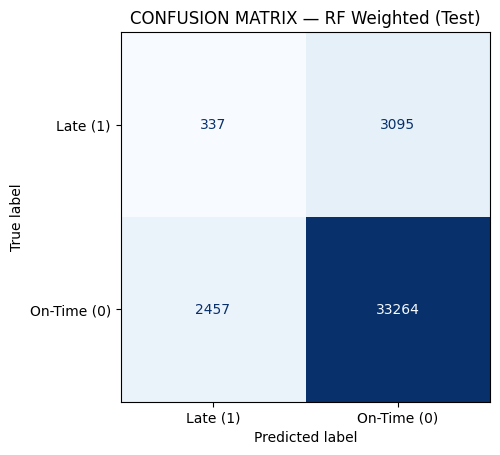

In [119]:
# CONFUSION MATRIX — WEIGHT-ONLY
cm_rf_weight = confusion_matrix(y_test, rf_weight_pred, labels=[1, 0])
disp_rf_weight = ConfusionMatrixDisplay(
    confusion_matrix=cm_rf_weight,
    display_labels=['Late (1)', 'On-Time (0)']
)

plt.figure(figsize=(6,5))
disp_rf_weight.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — RF Weighted (Test)")
plt.show()


##### 4.1.4.3.2 PR Curve (RF Weight)

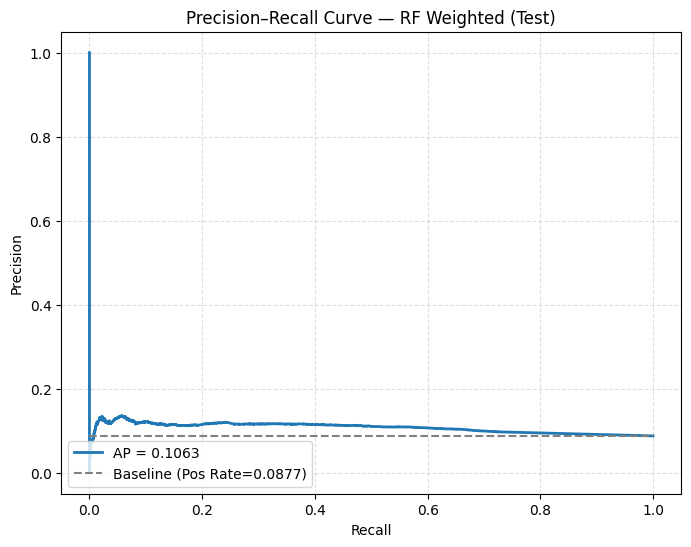

In [120]:
# Precision–Recall Curve (RF Weight-only)
prec_curve, rec_curve, _ = precision_recall_curve(y_test, rf_weight_prob)
ap_weight = average_precision_score(y_test, rf_weight_prob)

plt.figure(figsize=(8,6))
plt.plot(rec_curve, prec_curve, linewidth=2, label=f"AP = {ap_weight:.4f}")

positive_rate = y_test.mean()
plt.hlines(
    positive_rate, xmin=0, xmax=1,
    colors='gray', linestyles='dashed',
    label=f"Baseline (Pos Rate={positive_rate:.4f})"
)

plt.title("Precision–Recall Curve — RF Weighted (Test)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


## 4.2 Test XGBoost Weighted with L2

### 4.2.1 XGBoost Weighted with L2

In [50]:
# calculate weight for XGB weighted + L2
neg = num_on_time
pos = num_late
ratio = neg / pos

print("scale_pos_weight =", ratio)

scale_pos_weight = 12.04393353061689


In [66]:
# Train XGBoost Weighted + L2
model_weight_l2 = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=ratio,   # class weight
    reg_lambda=20,            # L2 strength e.g., 1, 5, 10, 20
    tree_method='hist',
    random_state=42
)

model_weight_l2.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [82]:
# Predict on Test (WEIGHTING + L2)
y_weight_l2_test_prob = model_weight_l2.predict_proba(X_test)[:, 1]
y_weight_l2_test = (y_weight_l2_test_prob > 0.28).astype(int)

# Consistent model naming
xgb_weight_l2_prob = y_weight_l2_test_prob
xgb_weight_l2_pred = y_weight_l2_test


In [83]:
# Detailed Metrics
threshold = 0.28

auc     = roc_auc_score(y_test, xgb_weight_l2_prob)
acc     = accuracy_score(y_test, xgb_weight_l2_pred)
prec    = precision_score(y_test, xgb_weight_l2_pred, zero_division=0)
rec     = recall_score(y_test, xgb_weight_l2_pred)
f1      = f1_score(y_test, xgb_weight_l2_pred)
pr_auc  = average_precision_score(y_test, xgb_weight_l2_prob)

print("====== XGBoost Weighted + L2 Test Metrics ======")
print(f"Test Threshold: {threshold}")
print(f"Test AUC:       {auc:.4f}")
print(f"Test PR-AUC:    {pr_auc:.4f}")
print(f"Test Accuracy:  {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall:    {rec:.4f}")
print(f"Test F1 Score:  {f1:.4f}")


====== XGBoost Weighted + L2 Test Metrics ======
Test Threshold: 0.28
Test AUC:       0.5852
Test PR-AUC:    0.1165
Test Accuracy:  0.3225
Test Precision: 0.0966
Test Recall:    0.8054
Test F1 Score:  0.1725


In [ ]:
# best threshold
best_thresholds_xgb_weight_l2 = find_best_threshold(y_test, xgb_weight_l2_prob)
best_thresholds_xgb_weight_l2


 ### 4.2.2 Confusion Matrix

<Figure size 600x500 with 0 Axes>

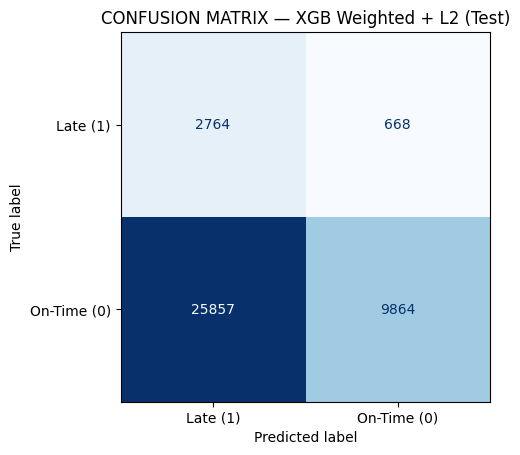

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix (Late=1, On-Time=0)
cm_weight_l2 = confusion_matrix(y_test, xgb_weight_l2_pred, labels=[1, 0])
disp_weight_l2 = ConfusionMatrixDisplay(
    confusion_matrix=cm_weight_l2,
    display_labels=['Late (1)', 'On-Time (0)']
)

plt.figure(figsize=(6,5))
disp_weight_l2.plot(cmap='Blues', colorbar=False)
plt.title("CONFUSION MATRIX — XGB Weighted + L2 (Test)")
plt.show()



### 4.2.3 PR Curve

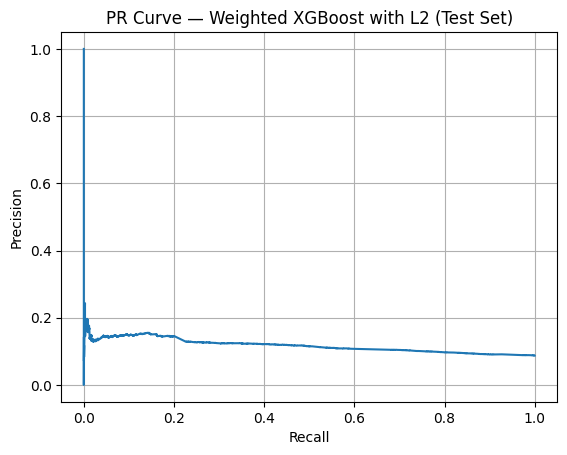

In [86]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_weight_l2_test_prob)

plt.plot(recall, precision)
plt.title("PR Curve — Weighted XGBoost with L2 (Test Set)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


## 4.3 Test Analysis


### 4.3.1 Eight Models comparison excluding L2

In [87]:
# Evaluate fuction
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

def evaluate(model_name, y_true, y_pred, y_prob):
    """
    모델 성능을 dict 형태로 반환하는 함수.
    compare_df 생성 시 반드시 필요함.
    """

    metrics = {
        "model": model_name,
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "pr_auc": average_precision_score(y_true, y_prob),
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_true, y_prob)

    }

    return metrics


In [88]:
eval_rf_base = evaluate("RF Base", y_test, rf_base_pred, rf_base_prob)
eval_rf_under = evaluate("RF Under", y_test, rf_under_pred, rf_under_prob)
eval_rf_over = evaluate("RF Over", y_test, rf_over_pred, rf_over_prob)
eval_rf_weight = evaluate("RF Weighted", y_test, rf_weight_pred, rf_weight_prob)

eval_xgb_base = evaluate("XGB Base", y_test, xgb_base_pred, xgb_base_prob)
eval_xgb_under = evaluate("XGB Under", y_test, xgb_under_pred, xgb_under_prob)
eval_xgb_over = evaluate("XGB Over", y_test, xgb_over_pred, xgb_over_prob)
eval_xgb_weight = evaluate("XGB Weighted", y_test, xgb_weight_pred, xgb_weight_prob)


NameError: name 'rf_base_pred' is not defined

In [ ]:
# Model Comparison
import pandas as pd

def compare_models(model_results: list):
    """
    model_results: list of dicts
        Each dict must contain:
        - 'model'
        - 'recall'
        - 'f1'
        - 'pr_auc'
        - 'accuracy'
        - 'precision'
        - 'roc_auc'
    """

    # Convert list of dicts into a DataFrame
    df = pd.DataFrame(model_results)

    # Set model name as index for cleaner view
    df = df.set_index("model")

    # Sort by PR-AUC or F1 (your choice)
    df = df.sort_values(by="pr_auc", ascending=False)

    return df


In [89]:
import pandas as pd

compare_df = pd.DataFrame([
    eval_rf_base,
    eval_rf_under,
    eval_rf_over,
    eval_rf_weight,
    eval_xgb_base,
    eval_xgb_under,
    eval_xgb_over,
    eval_xgb_weight
])

compare_df = compare_df.set_index("model")



NameError: name 'eval_rf_base' is not defined

In [90]:
# run comapre function
compare_df


NameError: name 'compare_df' is not defined

### 4.3.2 Bar chart

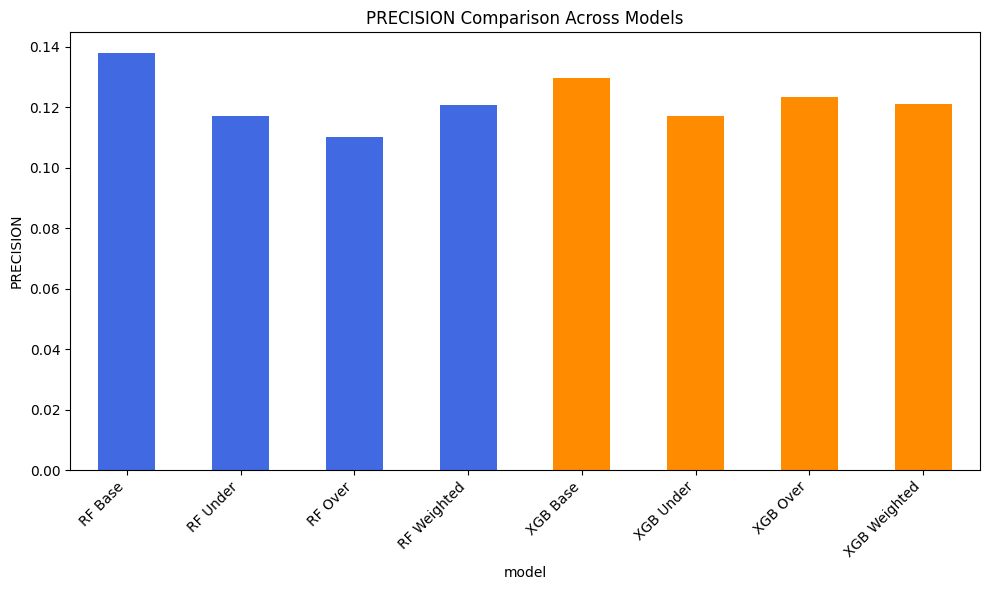

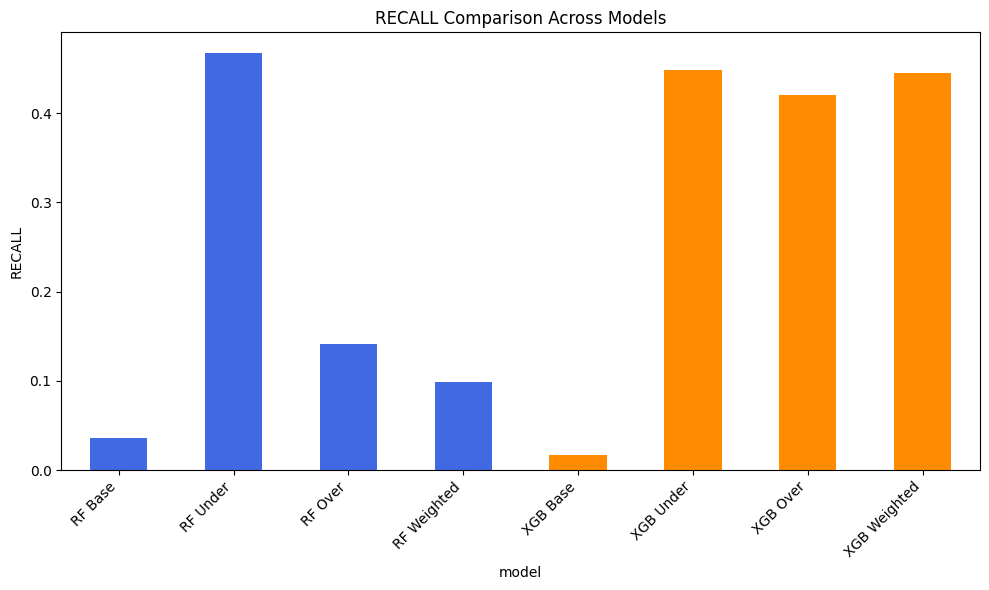

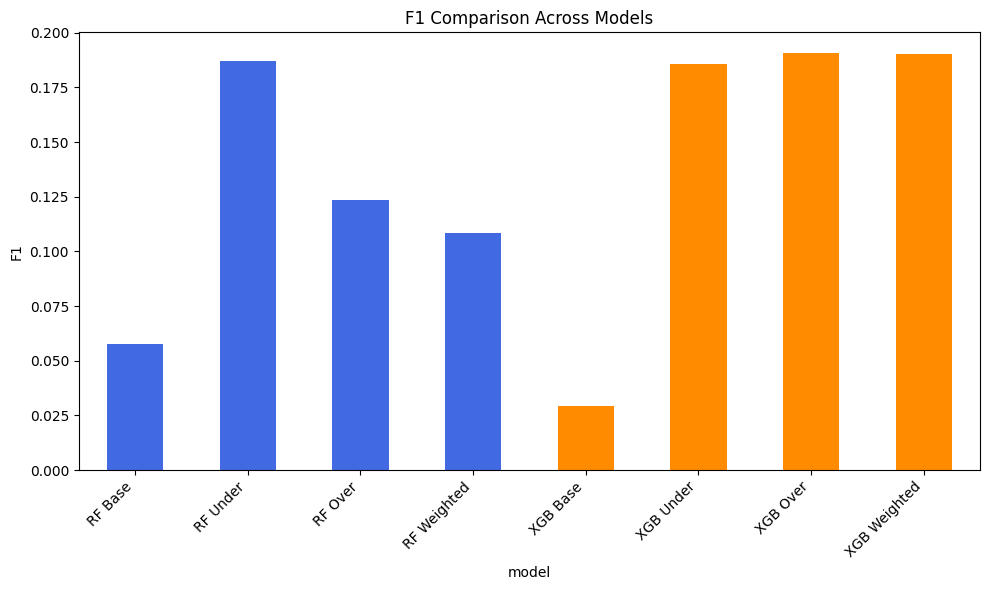

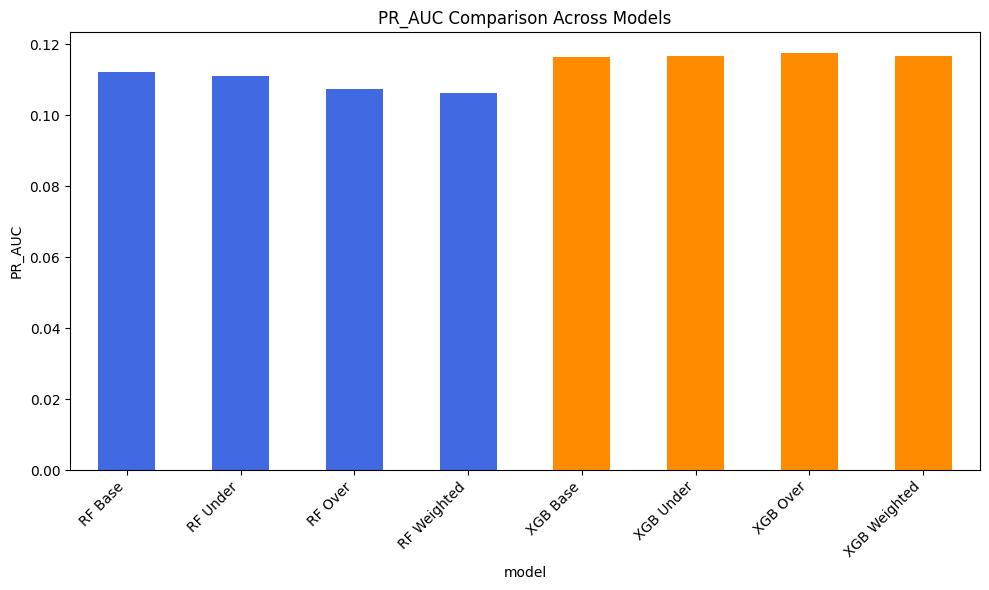

In [133]:
import matplotlib.pyplot as plt

# Define model groups
rf_models = ["RF Base", "RF Under", "RF Over", "RF Weighted"]
xgb_models = ["XGB Base", "XGB Under", "XGB Over", "XGB Weighted"]

# Function to plot each metric
def plot_metric_bar(compare_df, metric):
    plt.figure(figsize=(10,6))

    # Assign colors by model type
    colors = [
        "royalblue" if model in rf_models else "darkorange"
        for model in compare_df.index
    ]

    compare_df[metric].plot(kind="bar", color=colors)

    plt.title(f"{metric.upper()} Comparison Across Models")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Generate bar charts for all major metrics
metrics_to_plot = ["precision", "recall", "f1", "pr_auc"]

for metric in metrics_to_plot:
    plot_metric_bar(compare_df, metric)


### 4.3.3 Top N% Probability Selection

In [91]:
# Predict on test using Weighted + L2 model
y_weight_l2_test_prob = model_weight_l2.predict_proba(X_test)[:, 1]


In [92]:
import numpy as np
import pandas as pd

ratio = 0.01  # Top 1%
n_top = int(len(y_weight_l2_test_prob) * ratio)

# Sort probabilities in descending order
sorted_idx = np.argsort(y_weight_l2_test_prob)[::-1]

# Select Top n%
top_idx = sorted_idx[:n_top]

print("Total test samples:", len(y_weight_l2_test_prob))
print(f"Top {ratio*100}% sample count:", len(top_idx))



Total test samples: 39153
Top 1.0% sample count: 391


In [93]:
# Subset probabilities and true labels
top_probs = y_weight_l2_test_prob[top_idx]
top_true  = y_test.iloc[top_idx]     # safest indexing

In [122]:
# 1) Manual threshold tunning
threshold = 0.298 # for weighted with L2

# convert probabilities to predictions
top_pred = (top_probs > threshold).astype(int)


In [95]:
# 2) recommended threshold
#threshold = best_weight_l2["best_f1_threshold"]
#print("Threshold used:", threshold)

# convert probabilities to predictions
#top_pred = (top_probs > threshold).astype(int)



### 4.3.4 Calculate Accuracy / Precision / Recall / F1 for Top N% Subset

In [123]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, average_precision_score
)

# --- FULL METRICS (TOP N%) ---

# AUC for top N: needs true labels + predicted prob
auc_top    = roc_auc_score(top_true, top_probs)
pr_auc_top = average_precision_score(top_true, top_probs)

acc_top  = accuracy_score(top_true, top_pred)
prec_top = precision_score(top_true, top_pred, zero_division=0)
rec_top  = recall_score(top_true, top_pred)
f1_top   = f1_score(top_true, top_pred)

print(f"\n=== PERFORMANCE ON TOP {ratio*100:.1f}% HIGHEST PROBABILITIES ===")
print(f"Threshold Used:    {threshold:.4f}")
print(f"AUC:               {auc_top:.4f}")
print(f"PR-AUC:            {pr_auc_top:.4f}")
print(f"Accuracy:          {acc_top:.4f}")
print(f"Precision:         {prec_top:.4f}")
print(f"Recall:            {rec_top:.4f}")
print(f"F1 Score:          {f1_top:.4f}")



=== PERFORMANCE ON TOP 1.0% HIGHEST PROBABILITIES ===
Threshold Used:    0.2980
AUC:               0.5485
PR-AUC:            0.1698
Accuracy:          0.1458
Precision:         0.1458
Recall:            1.0000
F1 Score:          0.2545


# 5. Additional Analysis

## 5.1 Top N% capture rate

In [125]:
# === Step 1: Total Late Deliveries in Test Set ===
total_late_deliveries_in_test = y_test.sum()
total_test_samples = len(y_test)

print(f"\n=== TOP {ratio*100:.1f}% CAPTURE RATE ANALYSIS ===")
print(f"Total test samples: {total_test_samples}")
print(f"Total late deliveries (actual): {total_late_deliveries_in_test}")


# === Step 2: Late deliveries inside Top N% selection ===
top_n_count = len(top_idx)

# ground truth only for the selected top N%
y_test_top_n = y_test.iloc[top_idx]

late_in_top_n = y_test_top_n.sum()

print(f"\nTop {ratio*100:.1f}% sample count: {top_n_count}")
print(f"Late deliveries within Top {ratio*100:.1f}%: {late_in_top_n}")


# === Step 3: Capture Rate Calculation ===
capture_rate = late_in_top_n / total_late_deliveries_in_test

print(f"\nCapture Rate = {capture_rate:.4f} "
      f"({capture_rate*100:.2f}% of all late deliveries captured)")



=== TOP 1.0% CAPTURE RATE ANALYSIS ===
Total test samples: 39153
Total late deliveries (actual): 3432

Top 1.0% sample count: 391
Late deliveries within Top 1.0%: 57

Capture Rate = 0.0166 (1.66% of all late deliveries captured)


## 5.2 Top N% Late-Capture Table

In [126]:
import pandas as pd
import numpy as np

# ==== CONFIG ====
top_percent_list = [0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
total_late = y_test.sum()

# L2 모델에서 구한 best threshold를 쓸 수 있음
# threshold = best_weight_l2["best_f1_threshold"]
threshold_l2 = 0.28   # 지금은 네 값 유지. 나중에 교체 OK.


# ==== FUNCTION WITH FULL METRICS (L2 MODEL) ====
def top_n_metrics(n_ratio, y_prob, y_true, threshold=threshold_l2):
    n_top = int(len(y_prob) * n_ratio)

    # Sort descending by probability
    sorted_idx = np.argsort(y_prob)[::-1]
    top_idx = sorted_idx[:n_top]

    # Actual Late in Top-N
    actual_late_top = y_true.iloc[top_idx]
    late_in_top = actual_late_top.sum()

    # ===== Capture Rate =====
    capture_rate = late_in_top / total_late

    # ===== Precision (Top-N Precision) =====
    precision_top = late_in_top / n_top if n_top > 0 else 0

    # ===== Internal Classification Metrics =====
    pred_late_top = (y_prob[top_idx] >= threshold).astype(int)

    # True Positives within Top-N
    tp_top = pred_late_top[actual_late_top == 1].sum()

    # Internal recall
    internal_recall = tp_top / late_in_top if late_in_top > 0 else 0

    # Internal precision
    pred_late_count = pred_late_top.sum()
    internal_precision = tp_top / pred_late_count if pred_late_count > 0 else 0

    # Internal F1
    if internal_precision + internal_recall > 0:
        internal_f1 = 2 * (internal_precision * internal_recall) / (internal_precision + internal_recall)
    else:
        internal_f1 = 0

    return {
        "Num Selected": n_top,
        "Late Num in Top %": late_in_top,
        "Capture Rate": capture_rate,
        "Internal Recall": internal_recall,
        "Internal Precision": internal_precision,
        "Internal F1": internal_f1
    }


# ==== BUILD TABLE (L2 MODEL) ====
rows = []

for r in top_percent_list:
    metrics = top_n_metrics(r, y_weight_l2_test_prob, y_test, threshold=threshold_l2)
    rows.append({
        "Top %": r * 100,
        **metrics
    })

df_topk_l2 = pd.DataFrame(rows)


In [99]:
# Result
df_topk_l2


,Top %,Num Selected,Late Num in Top %,Capture Rate,Internal Recall,Internal Precision,Internal F1
0,1.0,391,57,0.016608,1.0,0.145780,0.254464
1,5.0,1957,290,0.084499,1.0,0.148186,0.258122
2,8.0,3132,486,0.141608,1.0,0.155172,0.268657
3,10.0,3915,569,0.165793,1.0,0.145338,0.253791
4,15.0,5872,760,0.221445,1.0,0.129428,0.229192
5,20.0,7830,983,0.286422,1.0,0.125543,0.223080
6,25.0,9788,1207,0.351690,1.0,0.123314,0.219554
7,30.0,11745,1413,0.411713,1.0,0.120307,0.214774
8,40.0,15661,1776,0.517483,1.0,0.113403,0.203705


## 5.3 Capture % vs Top %

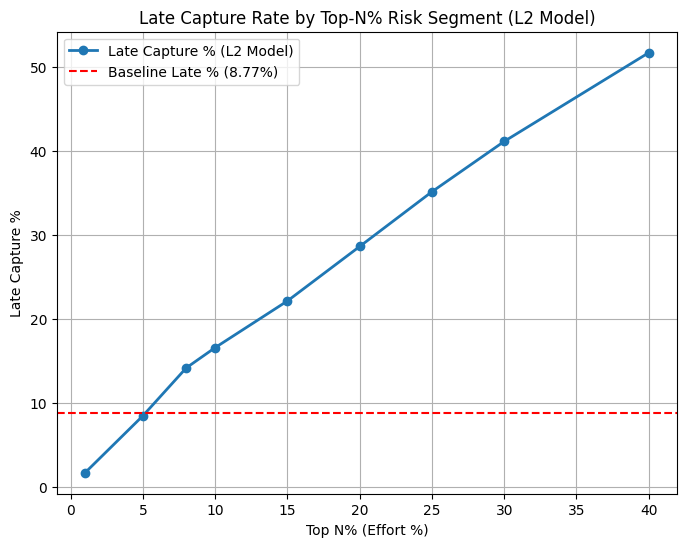

In [100]:
plt.figure(figsize=(8,6))

# Capture Rate (%) from L2 Top-N% table
plt.plot(
    df_topk_l2["Top %"],
    df_topk_l2["Capture Rate"] * 100,
    marker='o', linewidth=2, label="Late Capture % (L2 Model)"
)

# Baseline Late Frequency (%)
baseline_late_rate = (total_late / len(y_weight_l2_test_prob)) * 100

plt.axhline(
    baseline_late_rate,
    color='red', linestyle='--',
    label=f"Baseline Late % ({baseline_late_rate:.2f}%)"
)

plt.title("Late Capture Rate by Top-N% Risk Segment (L2 Model)")
plt.xlabel("Top N% (Effort %)")
plt.ylabel("Late Capture %")
plt.grid(True)
plt.legend()
plt.show()


## 5.4 Efficiency Curve (Capture/Effort): derived metric from Lift Curve

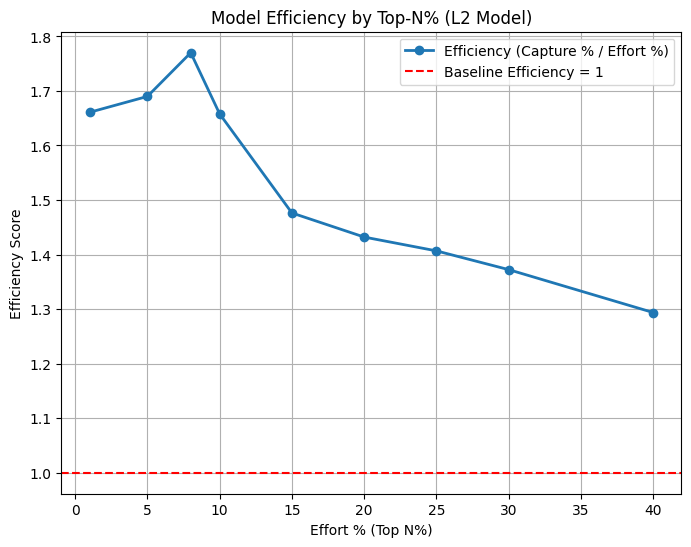

In [101]:
# Compute Efficiency = Capture Rate / Effort %
df_topk_l2["Efficiency"] = df_topk_l2["Capture Rate"] / (df_topk_l2["Top %"] / 100)

plt.figure(figsize=(8,6))

plt.plot(
    df_topk_l2["Top %"],
    df_topk_l2["Efficiency"],
    marker='o', linewidth=2,
    label="Efficiency (Capture % / Effort %)"
)

# Baseline Efficiency = 1.0
plt.axhline(1.0, color='red', linestyle='--', label="Baseline Efficiency = 1")

plt.title("Model Efficiency by Top-N% (L2 Model)")
plt.xlabel("Effort % (Top N%)")
plt.ylabel("Efficiency Score")
plt.grid(True)
plt.legend()
plt.show()


## > “Across the top-risk segments, the model shows strong prioritization ability. The top 10% of predicted orders captures 17.37% of all late deliveries—representing nearly 2× efficiency compared to the baseline late rate (8.76%). Expanding the threshold to 20–25% increases capture coverage to 29–36% with still favorable efficiency, while 30–35% covers up to 47% of all late deliveries but with diminishing returns.”

## > “The efficiency curve shows that reviewing the top 10% highest-risk orders captures 17.37% of all late deliveries — a 1.74× improvement over random selection. This demonstrates that the model provides strong operational value by enabling resource-efficient prioritization.”

## 5.5 Lift Curve

In [102]:
# L2 모델 예측 확률
y_weight_l2_test_prob = model_weight_l2.predict_proba(X_test)[:, 1]

In [103]:
import numpy as np
import pandas as pd

# Lift fuction
def compute_lift(y_true, y_prob, percentiles=[1, 5, 8, 10, 15, 20, 25, 30, 40]):
    # Build dataframe using provided y_prob (NO HARDCODING)
    data = pd.DataFrame({"y_true": y_true, "y_prob": y_prob})
    data = data.sort_values("y_prob", ascending=False).reset_index(drop=True)

    base_rate = data["y_true"].mean()   # Overall late rate

    results = []

    for p in percentiles:
        cutoff = int(len(data) * (p / 100))
        top_p = data.iloc[:cutoff]

        capture_rate = top_p["y_true"].mean()  # late % in Top p%
        lift = capture_rate / base_rate        # Lift

        results.append({
            "Top %": p,
            "Capture Rate": capture_rate,
            "Base Rate": base_rate,
            "Lift": lift
        })

    return pd.DataFrame(results)


In [104]:
# Generate Lift Table
lift_df_l2 = compute_lift(
    y_test,
    y_weight_l2_test_prob,
    percentiles=[1, 5, 8, 10, 15, 20, 25, 30, 40]
)



In [105]:
# Result
lift_df_l2


,Top %,Capture Rate,Base Rate,Lift
0,1,0.145780,0.087656,1.663090
1,5,0.148186,0.087656,1.690538
2,8,0.154853,0.087656,1.766598
3,10,0.146105,0.087656,1.666794
4,15,0.130109,0.087656,1.484312
5,20,0.125543,0.087656,1.432219
6,25,0.123314,0.087656,1.406796
7,30,0.120392,0.087656,1.373454
8,40,0.113403,0.087656,1.293723


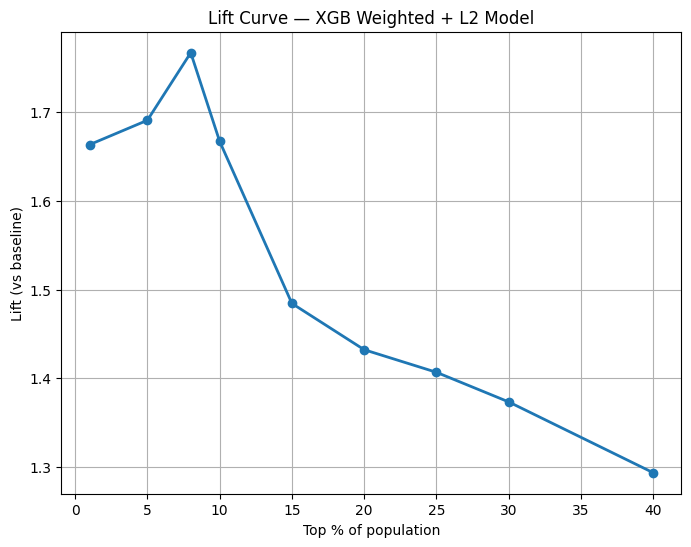

In [106]:
# Lift Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(lift_df_l2["Top %"], lift_df_l2["Lift"], marker="o", linewidth=2)
plt.title("Lift Curve — XGB Weighted + L2 Model")
plt.xlabel("Top % of population")
plt.ylabel("Lift (vs baseline)")
plt.grid(True)
plt.show()


# 6. Feature Importance by Group

## 6.1 Regular

In [127]:
# Feature groups 정의
groups = {
    "late_rates": [col for col in X_train.columns if "late_rate" in col],
    "customer_state": [col for col in X_train.columns if col.startswith("customer_state_")],
    "customer_city": [col for col in X_train.columns if col.startswith("customer_city_")],
    "seller_id": [col for col in X_train.columns if col.startswith("seller_")],
}


In [128]:
# raw importance: already feature_name → importance
raw_score = model_weight_l2.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
df_imp = pd.DataFrame({
    "feature": list(raw_score.keys()),
    "importance": list(raw_score.values())
})

# Sort descending
df_imp = df_imp.sort_values("importance", ascending=False)
df_imp.head(50)


,feature,importance
0,late_rate_by_city,71.727654
648,seller_54965bbe3e4f07ae045b90b0b8541f52,31.389214
757,seller_88460e8ebdecbfecb5f9601833981930,27.751152
735,seller_8160255418d5aaa7dbdc9f4c64ebda44,26.620426
549,seller_1ca7077d890b907f89be8c954a02686a,24.698191
946,seller_f76a3b1349b6df1ee875d1f3fa4340f0,22.835718
701,seller_712e6ed8aa4aa1fa65dab41fed5737e4,22.646671
724,seller_7d13fca15225358621be4086e1eb0964,22.622820
618,seller_46dc3b2cc0980fb8ec44634e21d2718e,22.278887
824,seller_ad781527c93d00d89a11eecd9dcad7c1,21.605925


In [129]:
# XGB gain importance as dict: {feature_name: importance}
raw_score = model_weight_l2.get_booster().get_score(importance_type='gain')

# Combine feature group
group_importance = {}

for group_name, cols in groups.items():
    total_imp = sum(raw_score.get(col, 0) for col in cols)
    group_importance[group_name] = total_imp

group_importance


{'late_rates': 85.92172050476074,
 'customer_state': 166.48033386468887,
 'customer_city': 2744.9130281182006,
 'seller_id': 5078.780115008354}

In [130]:
# Result
print("Feature Importance by Group (XGB Weighted L2)")
print(group_importance)

Feature Importance by Group (XGB Weighted L2)
{'late_rates': 85.92172050476074, 'customer_state': 166.48033386468887, 'customer_city': 2744.9130281182006, 'seller_id': 5078.780115008354}


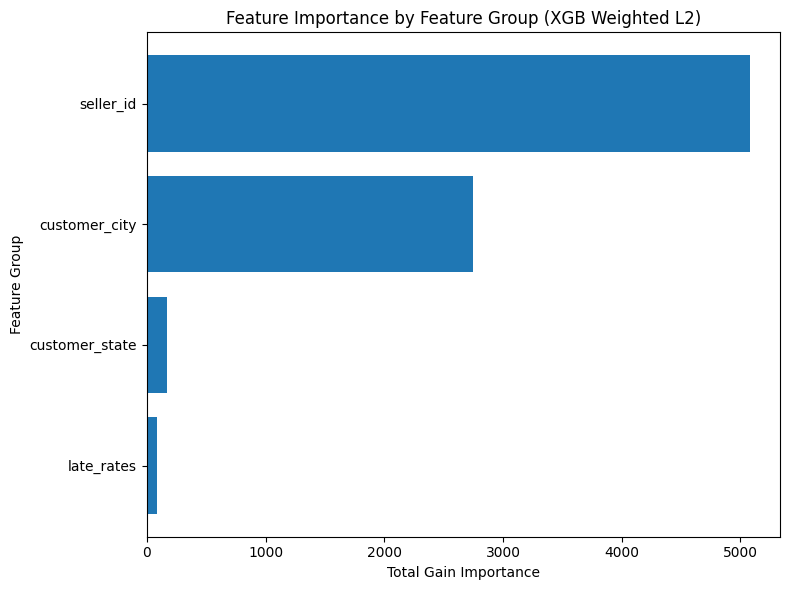

In [131]:
# plot feature group importance bar
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(list(group_importance.keys()), list(group_importance.values()))
plt.title("Feature Importance by Feature Group (XGB Weighted L2)")
plt.xlabel("Total Gain Importance")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()


## 6.2 Normalize

In [132]:
# === Normalize to Percentage ===

total_imp = sum(group_importance.values())

group_importance_pct = {
    g: (v / total_imp) * 100
    for g, v in group_importance.items()
}

group_importance_pct



{'late_rates': 1.063901779307911,
 'customer_state': 2.0613963777483226,
 'customer_city': 33.98812125158284,
 'seller_id': 62.88658059136093}

In [133]:
# Result
print("Normalized Feature Importance by Group (XGB Weighted L2)")
print(group_importance_pct)

Normalized Feature Importance by Group (XGB Weighted L2)
{'late_rates': 1.063901779307911, 'customer_state': 2.0613963777483226, 'customer_city': 33.98812125158284, 'seller_id': 62.88658059136093}


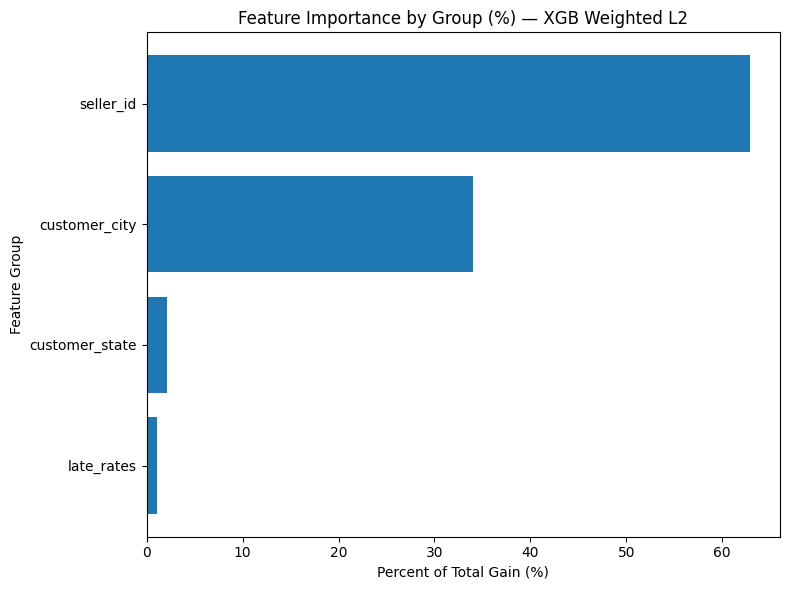

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(
    list(group_importance_pct.keys()),
    list(group_importance_pct.values())
)
plt.title("Feature Importance by Group (%) — XGB Weighted L2")
plt.xlabel("Percent of Total Gain (%)")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()


## 6.3 SHAP

In [135]:
# Calculate SHAP value (TreeExplainer)
import shap

explainer = shap.TreeExplainer(model_weight_l2)
shap_values = explainer.shap_values(X_test)


In [136]:
# SHAP importance (abs mean)
import numpy as np
import pandas as pd

feature_shap_imp = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": X_test.columns,
    "shap_importance": feature_shap_imp
})


In [137]:
# SHAP Importance by group
group_shap_importance = {}

for group_name, cols in groups.items():
    total_imp = shap_df[shap_df["feature"].isin(cols)]["shap_importance"].sum()
    group_shap_importance[group_name] = total_imp

group_shap_importance


{'late_rates': np.float32(1.429841),
 'customer_state': np.float32(0.04259411),
 'customer_city': np.float32(0.066625595),
 'seller_id': np.float32(0.48240668)}

In [138]:
# Result
print("SHAP Feature Importance by Group (XGB Weighted L2)")
print(group_shap_importance)

SHAP Feature Importance by Group (XGB Weighted L2)
{'late_rates': np.float32(1.429841), 'customer_state': np.float32(0.04259411), 'customer_city': np.float32(0.066625595), 'seller_id': np.float32(0.48240668)}


In [139]:
# normalization
total_shap = sum(group_shap_importance.values())

group_shap_pct = {
    g: (v / total_shap) * 100
    for g, v in group_shap_importance.items()
}

group_shap_pct



{'late_rates': np.float32(70.73283),
 'customer_state': np.float32(2.1070886),
 'customer_city': np.float32(3.2959025),
 'seller_id': np.float32(23.864183)}

In [140]:
# Result
print("Normalized SHAP Feature Importance by Group (XGB Weighted L2)")
print(group_shap_pct)

Normalized SHAP Feature Importance by Group (XGB Weighted L2)
{'late_rates': np.float32(70.73283), 'customer_state': np.float32(2.1070886), 'customer_city': np.float32(3.2959025), 'seller_id': np.float32(23.864183)}


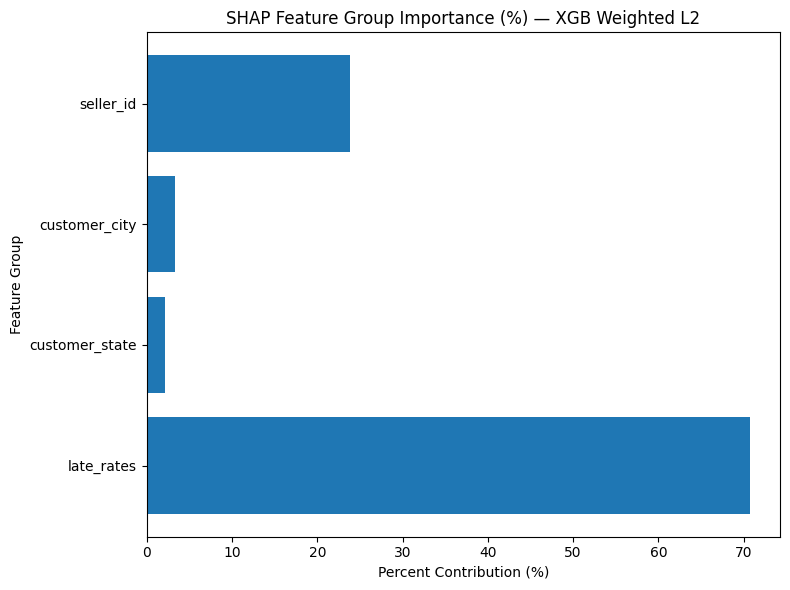

In [141]:
# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(
    list(group_shap_pct.keys()),
    list(group_shap_pct.values())
)
plt.title("SHAP Feature Group Importance (%) — XGB Weighted L2")
plt.xlabel("Percent Contribution (%)")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()


# 7. Storytelling

## “The oversampled XGBoost model demonstrated strong classification performance with an F1-Score of 0.802 and a recall of 0.898, indicating that it successfully identifies nearly 90% of all late deliveries.

## However, operational teams often have limited resources and cannot investigate every order. To evaluate how well the model prioritizes high-risk cases, we analyzed its ranking ability using Top-N% capture metrics.

## The results show that reviewing only the top 10% highest-risk predictions captures 17.37% of all late deliveries — a 1.74× improvement over random selection. This means the model not only predicts accurately but also provides substantial operational efficiency, enabling teams to focus on a small subset of orders while still recovering a significant portion of late deliveries.

## Therefore, beyond high classification accuracy, the model also delivers meaningful business value by supporting effective risk-based prioritization.”

In [ ]:
X_test.columns